IMDB 리뷰 데이터셋을 사용하여 원-핫 인코딩과 단어 임베딩 방법으로 변경하여 순환 신경망 만들기

IMDB 리뷰 데이터셋
- imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터 셋
- 총 50,000개의 샘플로 이루어져있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.


In [1]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 300개만 사용.
from tensorflow.keras.datasets import imdb
(train_input,train_target), (test_input, test_target) = imdb.load_data(num_words =300)

In [2]:
# 훈련세트와 테스트 세트 크기 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 첫번째 리뷰의 길이 출력
print(len(train_input[0]))

218


In [4]:
# 두번째 리뷰 길이 출력
print(len(train_input[1]))

189


In [5]:
# 첫번째 리뷰에 담긴 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
# 훈련세트에서 검증 세트를 20% 떼어놓기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target =train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 훈련 세트의 각 리뷰의 길이 계산
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
# 리뷰 길이의 평균과 중간값
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


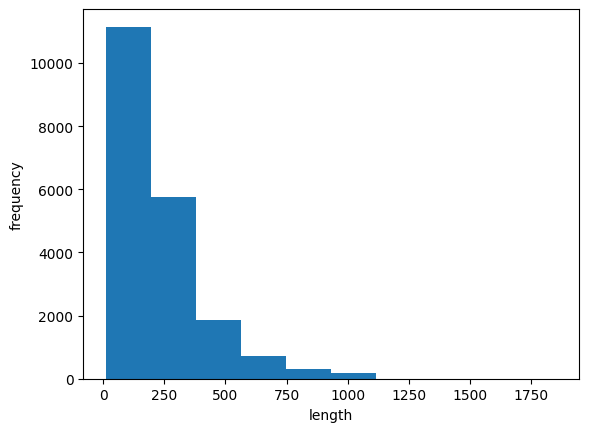

In [10]:
# lengths 배열을 히스토그램으로 표현하기
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
# 시퀀스 데이터의 길이를 맞추는 pad_sequence()함수를 사용하여 train_input의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

-길이를 맞추기 위해 지정한 길이가 되도록 잘라내거나 0으로 패딩.

-pad_sequences()함수는 기본적으로 maxlen보다 길 시퀀스의 앞부분을 자른다.

-만약 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences()함수의 truncating 매개변수의 값을 기본값 'pre'가 아닌'post'로 바꾸면 된다.

-시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않음.

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
#  첫번째 샘플 출력
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [14]:
# 원본 샘픔의 끝 확인
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [15]:
# 여섯번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
# 검증세트의 길이 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

순환 신경망 만들기

In [17]:
from tensorflow import keras
model =keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,300))) #순환층도 활성화 함수 사용. SimpleRNN 클래스의 activation 매개변수의 기본값은 tanh로 하이퍼볼릭 탄젠트 함수를 사용.
model.add(keras.layers.Dense(1, activation='sigmoid')) #이진분류 이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수사용

In [18]:
# keras.utils 패키지에 있는 to_categorical() 함수는 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 300)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))

1.0


In [22]:
# val_seq도 원-핫 인코딩으로 바꾸기
val_oh= keras.utils.to_categorical(val_seq)

In [23]:
# 모델의 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


순환 신경망 훈련하기

In [24]:
rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer =rmsprop, loss ='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only =True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs =100, batch_size=64, validation_data =(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 36ms/step - loss: 0.6905 - accuracy: 0.5294 - val_loss: 0.6844 - val_accuracy: 0.5542
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6836 - accuracy: 0.5558

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 10s 33ms/step - loss: 0.6771 - accuracy: 0.5814 - val_loss: 0.6717 - val_accuracy: 0.5888
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6650 - accuracy: 0.6074 - val_loss: 0.6599 - val_accuracy: 0.6164
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6532 - accuracy: 0.6322 - val_loss: 0.6514 - val_accuracy: 0.6352
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6422 - accuracy: 0.6499 - val_loss: 0.6368 - val_accuracy: 0.6562
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6305 - accuracy: 0.6697 - val_loss: 0.6258 - val_accuracy: 0.6738
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6186 - accuracy: 0.6837 - val_loss: 0.6176 - val_accuracy: 0.6826
Epoch 8/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6070 - accuracy: 0.6959 - val_loss: 0.6055 - val_accuracy: 0.688

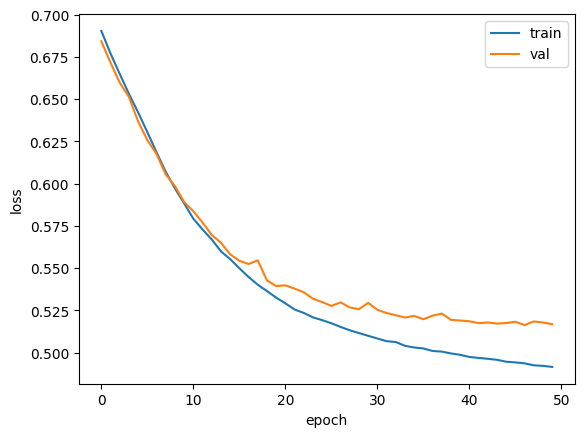

In [25]:
# 훈련손실과 검증 소실 그래프로 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


단어 임베딩을 사용하기
- 각 단어를 고정된 크기의 실수 벡터로 변경.
- 케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능 제공.
- 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습.
- 입력으로 정수 데이터를 받는다는 장점이 있어 메모리를 훨씬 효율적으로 사용할 수 있음.

In [27]:
# Embedding 클래스를 SimpleRNN 층 앞에 추가한 두번째 순환 신경망 만들기
model2 =keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
# 모델 구조 출력
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 모델 훈련
rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer =rmsprop, loss ='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6959 - accuracy: 0.5095 - val_loss: 0.6939 - val_accuracy: 0.5046
Epoch 2/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6917 - accuracy: 0.5252 - val_loss: 0.6922 - val_accuracy: 0.5184
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6888 - accuracy: 0.5390 - val_loss: 0.6906 - val_accuracy: 0.5270
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6860 - accuracy: 0.5519 - val_loss: 0.6890 - val_accuracy: 0.5340
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6831 - accuracy: 0.5621 - val_loss: 0.6877 - val_accuracy: 0.5422
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6800 - accuracy: 0.5730 - val_loss: 0.6864 - val_accuracy: 0.5392
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6771 - accuracy: 0.5753 - val_loss: 0.6850 - val_accuracy

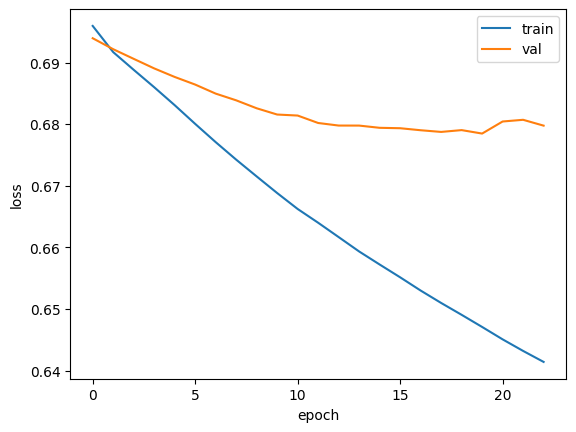

In [30]:
# 훈련손실과 검증 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()